# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
!pip install --upgrade pandas==1.0.3

    100% |████████████████████████████████| 10.0MB 3.0MB/s eta 0:00:01   63% |████████████████████▎           | 6.4MB 25.4MB/s eta 0:00:01    75% |████████████████████████        | 7.5MB 23.6MB/s eta 0:00:01    86% |███████████████████████████▊    | 8.7MB 25.3MB/s eta 0:00:01    98% |███████████████████████████████▋| 9.9MB 23.1MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.3MB/s eta 0:00:01   12% |████                            | 1.6MB 26.5MB/s eta 0:00:01    21% |███████                         | 2.9MB 27.2MB/s eta 0:00:01    58% |██████████████████▉             | 7.9MB 25.5MB/s eta 0:00:01    67% |█████████████████████▊          | 9.1MB 24.2MB/s eta 0:00:01    85% |███████████████████████████▌    | 11.5MB 24.2MB/s eta 0:00:01    95% |██████████████████████████████▌ | 12.7MB 25.3MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
     

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import json

df = pd.read_csv('twitter_archive_enhanced.csv')


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests


In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open('image-predictions (1).tsv','w') as file:
    file.write(response.text)
df1 = pd.read_csv('image-predictions (1).tsv', sep='\s+')

print(df1)

                tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
import tweepy



In [7]:
lines=[]
with open('tweet-json.txt') as f:
    # loop over each line in the file
    for line in f:
        # save the loaded json on this line in lines
        lines.append(json.loads(line))
# once loaded, convert list of dictionaries
# to a dataframe
json_df=pd.DataFrame(lines)


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
df1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
print(json_df)

                          created_at                  id              id_str  \
0     Tue Aug 01 16:23:56 +0000 2017  892420643555336193  892420643555336193   
1     Tue Aug 01 00:17:27 +0000 2017  892177421306343426  892177421306343426   
2     Mon Jul 31 00:18:03 +0000 2017  891815181378084864  891815181378084864   
3     Sun Jul 30 15:58:51 +0000 2017  891689557279858688  891689557279858688   
4     Sat Jul 29 16:00:24 +0000 2017  891327558926688256  891327558926688256   
...                              ...                 ...                 ...   
2349  Mon Nov 16 00:24:50 +0000 2015  666049248165822465  666049248165822465   
2350  Mon Nov 16 00:04:52 +0000 2015  666044226329800704  666044226329800704   
2351  Sun Nov 15 23:21:54 +0000 2015  666033412701032449  666033412701032449   
2352  Sun Nov 15 23:05:30 +0000 2015  666029285002620928  666029285002620928   
2353  Sun Nov 15 22:32:08 +0000 2015  666020888022790149  666020888022790149   

                                       

ABove we can see the data in its truest form. We see that there is many missing values and some of the column names are not descriptive. Furthermore for json_df it is not properly formatted into a data frame.

### Quality issues
1. Inconsistent formatting

2. Duplicate Values

3. Missing Values

4. Non-descriptive column labels

5. drop values after August 1st, 2017

6. Change to dataframe formatting

7. Data Types

8. Remove Retweets

### Tidiness issues
1.Dog stage should be one column bu is spread across four

2. Join the three dataframes together

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [11]:
# Make copies of original pieces of data
df_tarchive = df.copy()
df_response = df1.copy()
df_json = json_df.copy()

type(df_json)
print(df_json.dtypes)

created_at                        object
id                                 int64
id_str                            object
full_text                         object
truncated                           bool
display_text_range                object
entities                          object
extended_entities                 object
source                            object
in_reply_to_status_id            float64
in_reply_to_status_id_str         object
in_reply_to_user_id              float64
in_reply_to_user_id_str           object
in_reply_to_screen_name           object
user                              object
geo                               object
coordinates                       object
place                             object
contributors                      object
is_quote_status                     bool
retweet_count                      int64
favorite_count                     int64
favorited                           bool
retweeted                           bool
possibly_sensiti

In [12]:
# First replace None in stage columns with empty string as follows.
df_tarchive.doggo.replace('None', '', inplace=True)  # Like this do replacements for all four stages

# Then combine stage columns.
df_tarchive['stage'] = df_tarchive.doggo + df_tarchive.floofer + df_tarchive.pupper + df_tarchive.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.

df_tarchive.loc[df_tarchive.stage == 'doggopupper', 'stage'] = 'doggo, pupper' 
df_tarchive.loc[df_tarchive.stage == 'doggopuppo', 'stage'] = 'doggo, puppo' 
df_tarchive.loc[df_tarchive.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [13]:
df_tarchive = df_tarchive[df_tarchive.retweeted_status_id.isnull()]
df_tarchive = df_tarchive[df_tarchive.retweeted_status_user_id.isnull()]
df_tarchive = df_tarchive[df_tarchive.retweeted_status_timestamp.isnull()]

### Issue #1:

#### Define: There was a double ID in the id columns so we can see that the data is not being inputted into the dataframe accurately.

#### Code

In [14]:
df_json = pd.json_normalize(df_json['entities'])['media'].explode().apply(pd.Series)
df_json.rename(columns={"id": "tweet_id"}, inplace=True)

df_json.head()

,0,display_url,expanded_url,tweet_id,id_str,indices,media_url,media_url_https,sizes,source_status_id,source_status_id_str,source_user_id,source_user_id_str,type,url
0,NaN,pic.twitter.com/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643...,8.924206e+17,892420639486877696,"[86, 109]",http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,"{'large': {'w': 540, 'h': 528, 'resize': 'fit'...",NaN,NaN,NaN,NaN,photo,https://t.co/MgUWQ76dJU
1,NaN,pic.twitter.com/0Xxu71qeIV,https://twitter.com/dog_rates/status/892177421...,8.921774e+17,892177413194625024,"[139, 162]",http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,"{'large': {'w': 1407, 'h': 1600, 'resize': 'fi...",NaN,NaN,NaN,NaN,photo,https://t.co/0Xxu71qeIV
2,NaN,pic.twitter.com/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181...,8.918152e+17,891815175371796480,"[122, 145]",http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,"{'medium': {'w': 901, 'h': 1200, 'resize': 'fi...",NaN,NaN,NaN,NaN,photo,https://t.co/wUnZnhtVJB
3,NaN,pic.twitter.com/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557...,8.916896e+17,891689552724799489,"[80, 103]",http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,"{'medium': {'w': 901, 'h': 1200, 'resize': 'fi...",NaN,NaN,NaN,NaN,photo,https://t.co/tD36da7qLQ
4,NaN,pic.twitter.com/AtUZn91f7f,https://twitter.com/dog_rates/status/891327558...,8.913276e+17,891327551943041024,"[139, 162]",http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,"{'small': {'w': 680, 'h': 510, 'resize': 'fit'...",NaN,NaN,NaN,NaN,photo,https://t.co/AtUZn91f7f


In [15]:
#Dropping all the NaN values

In [16]:
df_json = df_json.drop(0,axis=1)
df_json = df_json.drop('source_status_id', axis='columns')
df_json = df_json.drop('source_status_id_str', axis='columns')
df_json = df_json.drop('source_user_id', axis='columns')
df_json = df_json.drop('source_user_id_str', axis='columns')
df_json = df_json.drop('tweet_id', axis='columns')
df_json = df_json.drop('media_url_https', axis='columns')
df_json = df_json.drop('expanded_url', axis='columns')
df_json = df_json.drop('indices', axis='columns')
df_json = df_json.drop('sizes', axis='columns')


In [17]:
#Renaming the column types and checking types

In [18]:
df_json.rename(columns={"id_str": "tweet_id"}, inplace=True)
df_json.rename(columns={"display_url": "Display_URL"}, inplace=True)
df_json.rename(columns={"media_url": "Media_URL"}, inplace=True)
df_json.rename(columns={"type": "Type"}, inplace=True)
df_json.rename(columns={"url": "URL"}, inplace=True)

df_json.head()
print(df_json.dtypes)

Display_URL    object
tweet_id       object
Media_URL      object
Type           object
URL            object
dtype: object


In [19]:
#Changing the the types to match the other columns and dropping NaN

In [20]:
df_tarchive['tweet_id'] = df_tarchive['tweet_id'].map(str)
df_response['tweet_id'] = df_response['tweet_id'].map(str)
df_tarchive = df_tarchive.dropna(axis='columns')
df_response = df_response.dropna(axis='columns')
print(df_tarchive.dtypes)
print(df_response.dtypes)

tweet_id              object
timestamp             object
source                object
text                  object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
stage                 object
dtype: object
tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object


In [21]:
#Checking for duplicates

In [22]:
df_response.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2070    False
2071    False
2072    False
2073    False
2074    False
Length: 2075, dtype: bool

In [23]:
#Checking for duplicates

In [24]:
df_tarchive.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2175, dtype: bool

In [25]:
#Checking the data

In [26]:
df_tarchive.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,None,None,None,NoneNoneNone
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,,None,None,None,NoneNoneNone
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,None,None,None,NoneNoneNone
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,,None,None,None,NoneNoneNone
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,,None,None,None,NoneNoneNone


#### Test

In [27]:
#Checking the Data

In [28]:
df_response.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #2: Merge the data together

#### Define we must merge the data together

#### Code

#### Test

In [29]:
merge = pd.merge(df_response, df_tarchive, on='tweet_id', how='outer')
merge = pd.merge(merge, df_json, on='tweet_id', how='outer')
merge = merge.replace(np.nan, 0)
merge.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,name,doggo,floofer,pupper,puppo,stage,Display_URL,Media_URL,Type,URL
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,None,,None,None,None,NoneNoneNone,0,0,0,0
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,a,,None,None,None,NoneNoneNone,0,0,0,0
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,a,,None,None,None,NoneNoneNone,0,0,0,0
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,a,,None,None,None,NoneNoneNone,0,0,0,0
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,None,,None,None,None,NoneNoneNone,0,0,0,0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [31]:
twitter_archive_master = merge
merge.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. THe first P1 is the most confident in predicting the type of dog in the image.

2. There are a lot of ratings on the good and great side

3. As expected P3 is the least confident in predicting the type of dog in the image.

In [32]:
rating = merge['rating_numerator'].value_counts()
rate12 = rating.values[0]
rate10 = rating.iloc[1]
rate11 = rating.iloc[2]
rate13 = rating.iloc[3]
rate9 = rating.iloc[4]
rate8 = rating.iloc[5]
rate7 = rating.iloc[6]
rate14 = rating.iloc[7]
rate5 = rating.iloc[8]
rate6 = rating.iloc[9]
rate3 = rating.iloc[10]
rate4 = rating.iloc[11]
rate2 = rating.iloc[12]
rate1 = rating.iloc[13]
rate0 = rating.iloc[14]

rate = [rate0,rate1,rate2,rate3,rate4,rate5,rate6,rate7,rate8,rate9,rate10,rate11,rate12,rate13,rate14]
print(rate)

[8, 9, 17, 32, 19, 43, 36, 98, 156, 307, 500, 442, 2437, 426, 54]


### Visualization

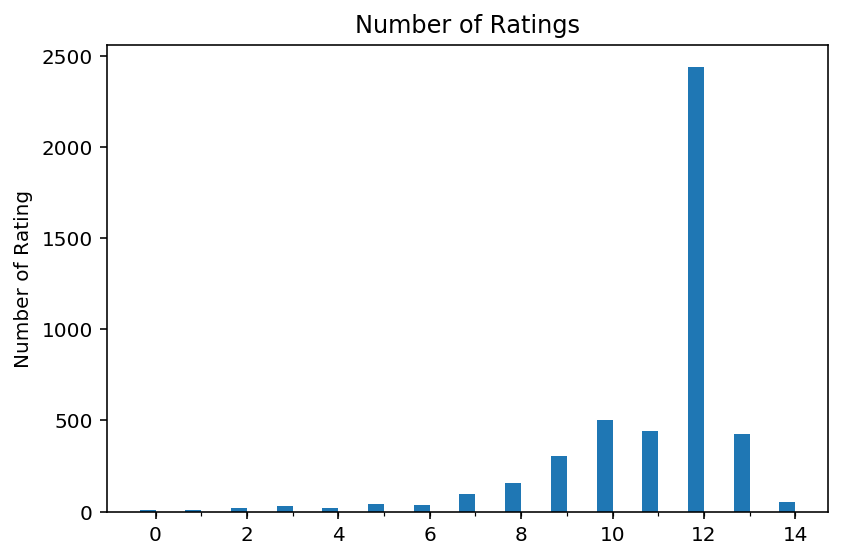

In [33]:
labels = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14']

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, rate, width,)


ax.set_ylabel('Number of Rating')
ax.set_title('Number of Ratings')
ax.set_xticks(x,labels)

fig.tight_layout()
plt.show()

In [34]:
labels = [1,2,3]
p1_conf = merge['p1_conf'].sample(n=10, random_state=1)
p2_conf = merge['p2_conf'].sample(n=10, random_state=1)
p3_conf = merge['p3_conf'].sample(n=10, random_state=1)

x = np.arange(len(labels))
width = 0.25


print(p1_conf)
print(x-width/2)

2715    0.000000
190     0.359843
2389    0.000000
2403    0.000000
4025    0.000000
3987    0.000000
250     0.071124
3104    0.000000
4215    0.000000
1787    0.950851
Name: p1_conf, dtype: float64
[-0.125  0.875  1.875]


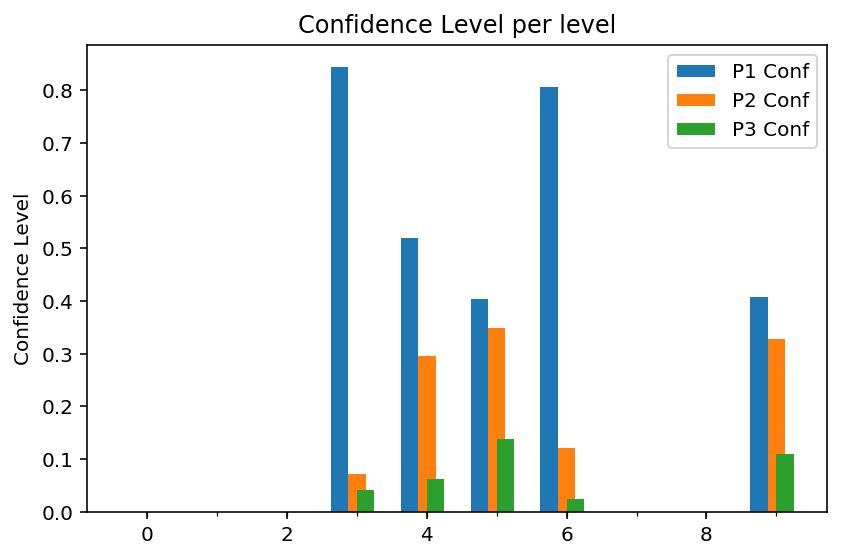

In [35]:
labels = [1,2,3,4,5,6,7,8,9,10]
p1_conf = merge['p1_conf'].sample(n=10, random_state=3)
p2_conf = merge['p2_conf'].sample(n=10, random_state=3)
p3_conf = merge['p3_conf'].sample(n=10, random_state=3)

x = np.arange(len(labels))
width = 0.25

fig,ax= plt.subplots()
rects1 = ax.bar(x - width, p1_conf, width, label='P1 Conf',edgecolor='white')
rects2 = ax.bar(x , p2_conf, width, label='P2 Conf',edgecolor='white')
rects3 = ax.bar(x + width/2, p3_conf, width, label='P3 Conf',edgecolor='white')

ax.set_ylabel('Confidence Level')
ax.set_title('Confidence Level per level')
ax.set_xticks(x, labels)
ax.legend()



fig.tight_layout()

plt.show()
